In [ ]:
#perform a simple neural network using any data set

Epoch 1/2
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5059 - accuracy: 0.4542 - val_loss: 1.2988 - val_accuracy: 0.5363
Epoch 2/2
1563/1563 [==============================] - 59s 37ms/step - loss: 1.1414 - accuracy: 0.5957 - val_loss: 1.0895 - val_accuracy: 0.6156
313/313 - 3s - loss: 1.0895 - accuracy: 0.6156 - 3s/epoch - 9ms/step
Test accuracy: 0.6155999898910522


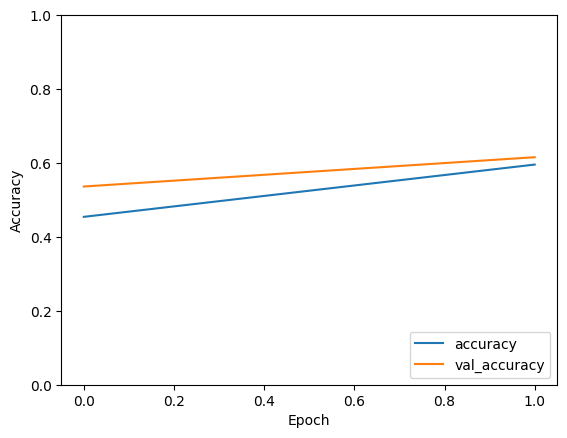

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
